In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus
import seaborn as sns

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.shape

(11162, 17)

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

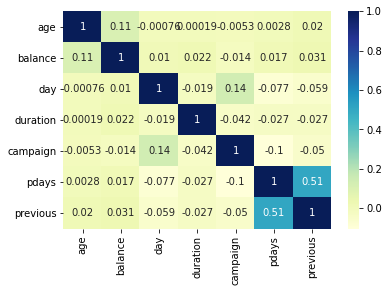

In [5]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)
plt.show()

In [6]:
def outlier_function(column_name):
    sns.distplot(df[column_name])

c:\users\laxmi pujar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


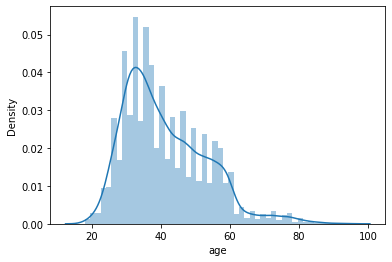

In [7]:
(df.columns)
column_names=['age','balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous']
outlier_function(column_names[0])

In [8]:
df.drop(df[df['age']>60].index,axis=0,inplace=True)
df.drop(df[df['age']<20].index,axis=0,inplace=True)

In [15]:
# df['balance'].describe()
# df['balance'].describe()
# df['day'].describe()
# df['duration'].describe()
df['campaign'].describe()

count    1380.000000
mean        2.185507
std         1.849781
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: campaign, dtype: float64

In [16]:
df.drop(df[df['campaign']>3].index,axis=0,inplace=True)
df.drop(df[df['campaign']<1].index,axis=0,inplace=True)

In [17]:
df.shape

(1178, 17)

In [18]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [20]:
encoded_df = preprocessor(df)
encoded_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
19,49,0,0,1,0,168,1,1,2,8,8,513,1,-1,0,3,1
20,28,0,0,1,0,785,1,0,2,8,8,442,2,-1,0,3,1


In [24]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Trining Score 0.6963906581740976
Testing Score 0.6271186440677966


In [27]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Trining Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Trining Score 0.7802547770700637
Testing Score 0.7584745762711864


In [28]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Trining Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Trining Score 0.8354564755838642
Testing Score 0.7161016949152542


In [41]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=10)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Trining Score 0.9426751592356688
Testing Score 0.7838983050847458


In [31]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.7144373673036093
0.6610169491525424
